<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab03/atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Histograma e equalização de histograma
*   Seguimentação com auxilio do histograma
*   Webcam opencv

## Histograma 

Na ultima aula, tentamos fazer a segmentação de um objeto da imagem pelo metodo força bruta #GoHorse, pode ser que funcione mas não é a forma mais intessnte de ser feita. Um histograma pode nos ajudar, ele plota em um gráfico de frequência as componentes de cores (r,g,b ou gray) da imagem.

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.6.0 


In [ ]:
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab03/bola.png" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab03/bolinha.png" /content
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab03/fuca.png" /content



--2023-02-10 19:52:38--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab03/bola.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10267 (10K) [image/png]
Saving to: ‘bola.png’

bola.png            100%[===================>]  10.03K  --.-KB/s    in 0s      

2023-02-10 19:52:38 (80.3 MB/s) - ‘bola.png’ saved [10267/10267]

/content: Scheme missing.
FINISHED --2023-02-10 19:52:38--
Total wall clock time: 0.3s
Downloaded: 1 files, 10K in 0s (80.3 MB/s)
--2023-02-10 19:52:38--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/lab03/bolinha.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.git

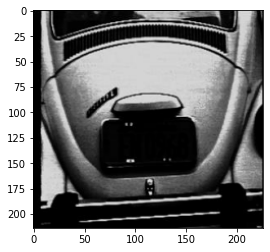

In [ ]:
img = cv2.imread("fuca.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)


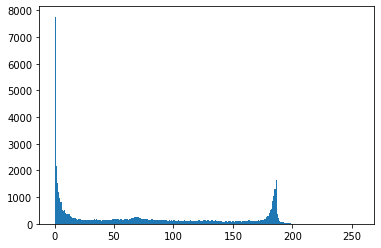

In [ ]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

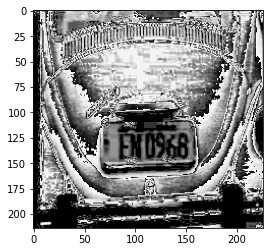

In [ ]:
# normalização de histograma

img_eq = cv2.equalizeHist(img)
plt.imshow(3*img_eq, cmap="Greys_r", vmin=0, vmax=255)

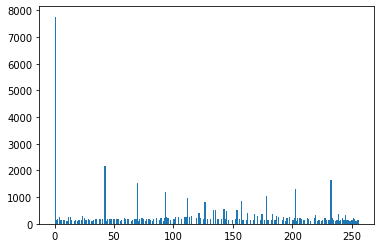

In [ ]:
plt.hist(3*img_eq.ravel(),256,[0,256]); plt.show()

Podemos fazer o mesmo para uma imgem colorida 

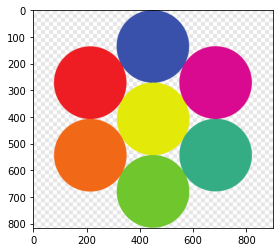

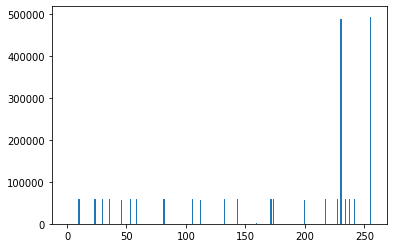

In [ ]:
imagem = cv2.imread("bola.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()
plt.hist(image.ravel(),256,[0,256]); plt.show()

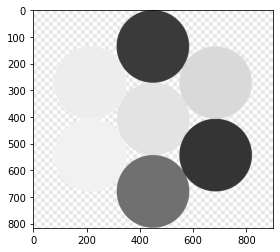

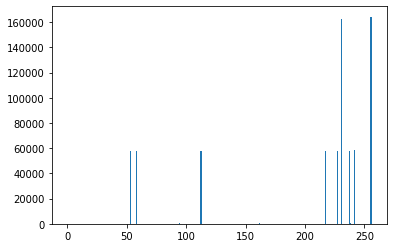

In [ ]:
#histograma Vermelho
plt.imshow(image[:,:,0], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,0].ravel(),256,[0,256]); plt.show()

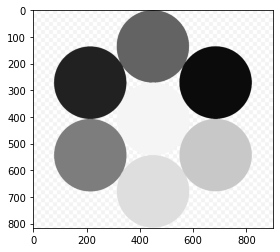

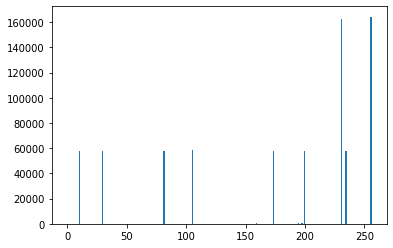

In [ ]:
# Histogrma Verde
plt.imshow(image[:,:,1], cmap="Greys_r", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,1].ravel(),256,[0,256]); plt.show()

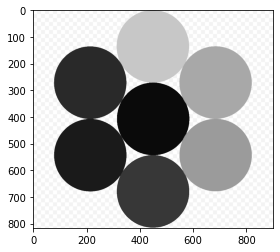

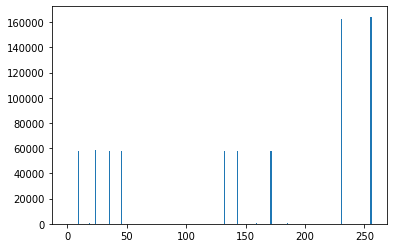

In [ ]:
# Histograma Azul
plt.imshow(image[:,:,2], cmap="Greys_r", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,2].ravel(),256,[0,256]); plt.show()

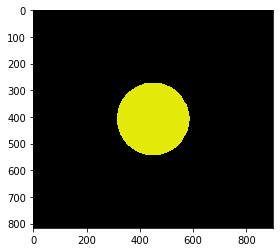

In [ ]:
image2 = image.copy()
gray_r = image2[:,:,0]
gray_g = image2[:,:,1]
gray_b = image2[:,:,2]

img_bola = image2.copy()

for y in range(0, image2.shape[0]):
    for x in range(0, image2.shape[1]):
        
        if gray_g[y][x] <= 230:
            img_bola[y][x]= 0
        if gray_b[y][x] >= 240:
            img_bola[y][x]= 0    

    

plt.imshow(img_bola, interpolation="none")
plt.show()

## Desafio 1

Faça a seguimentação da bolinha de cor laranja. Dica use 2 canais de cores para conseguir seguimentar. 

In [ ]:
# Implemente seu código


## Desafio 2 

Faça a seguimentação da bolinha para a imagem "bolinha.png". 

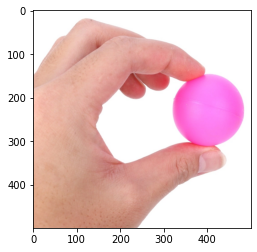

In [ ]:
imagem = cv2.imread("bolinha.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()

In [ ]:
# Implemente seu código

## Webcam e opencv

## Este recurso não vai funcionar no google colab

Podemos usar a nossa webcam para registrar imagens e videos, para isso usamos a função cv2.VideoCapture.


In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.5.5 


In [ ]:

webcam = cv2.VideoCapture(0) # pode acontecer do ID da camera não ser 0, ai precisa testar com outros numeros 

In [ ]:
t.sleep(3) # Espera a webcam ficar pronta

In [ ]:
val, image = webcam.read()

In [ ]:
val  # Checa se um frame chegou

True

In [ ]:
webcam.release() # fecha a webcam

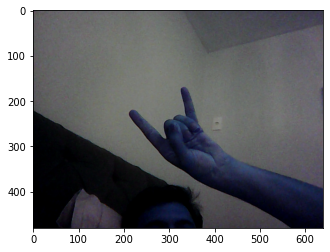

In [ ]:
plt.imshow(image)

## Desafio 3

Faça uma foto sua. 